In [10]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

カルマンフィルタ

ダイナミクス① 線形の時 推定標準偏差は収束する。
$$
    内部変数: \beta(t+1) = \beta(t) + w(t+1),\qquad w:N(0,\sigma_w^2)\\
    観測変数: \alpha(t) = \beta(t) + \varepsilon(t),\qquad \varepsilon:N(0,\sigma_\varepsilon^2)
$$

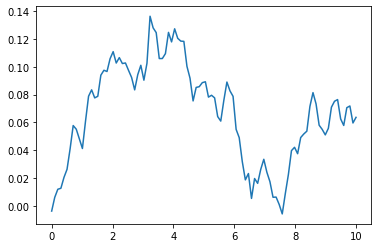

In [11]:
n = 100
σ = 0.1 # 観測時系列はランダムウォークとする。単位時間あたりの標準偏差
t_start = 0
t_stop = 10
seed = 32

np.random.seed(seed=seed)
t = np.linspace(t_start,t_stop,n)
a = (σ * (t_stop - t_start)/n * np.random.randn(n)).cumsum()

fig = plt.figure()
plt.get_current_fig_manager().canvas.figure = fig

plt.plot(t,a)

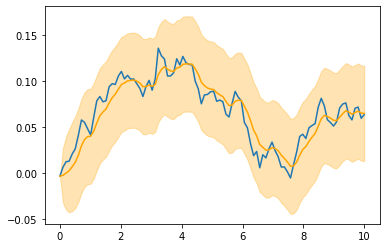

In [12]:
# カルマンフィルタ
σ_e = 0.1 # 観測変数に関する標準偏差
σ_w = 0.1 # 内部変数に関する単位時間あたりの標準偏差

sigma_w = σ_w * np.sqrt((t_stop - t_start)/n) # 離散時間に対する標準偏差

b = np.zeros(n) # ベータのガウス過程に対する期待値 
B = np.zeros(n) # ベータのガウス過程に対する分散

b[0] = a[0] # 初期値代入
B[0] = 0 # 標準偏差初期値代入

for i in range(1,n):
    b[i] = b[i-1] + (B[i-1] + sigma_w**2)/(B[i-1] + sigma_w**2 + σ_e**2) * (a[i] - b[i-1])
    B[i] = (B[i-1] + sigma_w**2) * ( 1.0 - (B[i-1] + sigma_w**2)**2/(B[i-1] + sigma_w**2)/(B[i-1] + sigma_w**2 + σ_e**2))

plt.get_current_fig_manager().canvas.figure = fig
plt.plot(t,b, color = 'orange')
plt.fill_between(t,b+np.sqrt(B), b-np.sqrt(B), alpha = 0.3, color='orange')